In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
numeric_columns=['Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity',
       'Price_Present']

In [3]:
clean_fundamen=pd.read_csv("../../Datasets/dataset_1.csv")
LabnF=pd.read_csv("../../Datasets/labnf.csv")
X,Y=clean_fundamen[numeric_columns],LabnF["Label"]
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X, Y, test_size=0.33, random_state=42)
trainscores=[]
testscores=[]
for i in range(2,32,2):
    clf = RandomForestClassifier( max_depth=i,random_state=0)
    # Full overfit
    clf.fit(Xtrain, Ytrain)
    trainscore=clf.score(Xtrain,Ytrain)
    trainscores.append(trainscore)
    testscore=clf.score(Xtest,Ytest)
    testscores.append(testscore)
    print("Max_Depth: ",i," Score Train:",trainscore)
    print("Max_Depth: ",i," Score Test:",testscore)

Max_Depth:  2  Score Train: 0.4718120464809459
Max_Depth:  2  Score Test: 0.4696095601112599
Max_Depth:  4  Score Train: 0.4781803420104531
Max_Depth:  4  Score Test: 0.4747089729061502
Max_Depth:  6  Score Train: 0.48924240117724666
Max_Depth:  6  Score Test: 0.4784691459771299
Max_Depth:  8  Score Train: 0.5107068554320799
Max_Depth:  8  Score Test: 0.48228082826826
Max_Depth:  10  Score Train: 0.5495509209925408
Max_Depth:  10  Score Test: 0.486710621201195
Max_Depth:  12  Score Train: 0.6126756989902066
Max_Depth:  12  Score Test: 0.48779231482435353
Max_Depth:  14  Score Train: 0.6870147663266859
Max_Depth:  14  Score Test: 0.49150097867518283
Max_Depth:  16  Score Train: 0.775282894403004
Max_Depth:  16  Score Test: 0.4924796538580406
Max_Depth:  18  Score Train: 0.8615720302430608
Max_Depth:  18  Score Test: 0.4917070155557845
Max_Depth:  20  Score Train: 0.9235043385599025
Max_Depth:  20  Score Test: 0.48619552899969093
Max_Depth:  22  Score Train: 0.9660780433348556
Max_Depth:

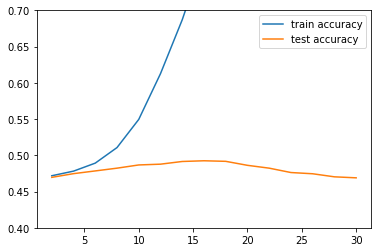

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(2,32,2),trainscores,label="train accuracy")
plt.plot(range(2,32,2),testscores,label="test accuracy")
plt.ylim(0.4, 0.7)
plt.legend()
